# Google Apps 商店的数据分析

## 简介

相信大家对移动应用商店都不陌生吧。Google Play Store（Google Play商店）是谷歌官方的软件应用商店，拥有上架软件数十万款，下载量更是突破了20亿次，为了手机用户提供了极为广泛的应用选择，很受大家的欢迎。



本数据集(googleplaystore.csv)包含了 Google Play 商店中 App 的数据。该数据是Kaggle中 [Google Play Store Apps](https://www.kaggle.com/lava18/google-play-store-apps) 的一部分，其中包含 Google Play 商店中 10k+ 应用软件的信息。

数据中的变量含义解释：
```
App: 应用的名称，字符变量。
Category: 应用所属的分类，字符变量。
Rating: 某应用的用户评分，数值变量。
Reviews: 某应用获得的用户评论数量，数值变量。
Size: 某应用的所占存储空间的大小，字符变量。
Installs: 用户安装和下载某应用的次数，字符变量。
Type: 付费或免费，分类变量。
Price: 价格，字符变量。
Content Rating: 应用商店针对内容给出的年龄评级组 - Children / Mature 21+ / Adult，分类变量。
Genres: 类型/流派，一个应用可以属于多个流派，比如音乐、游戏、家庭等，字符变量。
Last Updated: 应用最新更新的日期，字符变量。
Current Ver: 当前应用的版本，字符变量。
Android Ver: 安装该应用所需要的最低安卓版本，字符变量。

```

## 项目完成指南



本项目中的数据分析流程已经给出，但代码将完全由你自己进行书写，如果你无法完成本项目，说明你目前的能力并不足以完成 数据分析(进阶)纳米学位，建议先进行 数据分析（入门）纳米学位的学习，掌握进阶课程的先修知识。

对于数据分析过程的记录也是数据分析报告的一个重要部分，你可以自己在需要的位置插入Markdown cell，记录你在数据分析中的关键步骤和推理过程。比如：数据有什么样的特点，统计数据的含义是什么，你从可视化中可以得出什么结论，下一步分析是什么，为什么执行这种分析。如果你无法做到这一点，你也无法通过本项目。


> **小贴士**: 像这样的引用部分旨在为学员提供实用指导，帮助学员了解并使用 Jupyter notebook

## 1. 提出问题

在此项目中，你将以一名数据分析师的身份执行数据的探索性分析。你将了解数据分析过程的基本流程。在你分析数据之前，请先思考几个你需要了解的关于 Google 商店中应用的问题，例如，最受欢迎（下载量最高）的 Apps 有什么特征？哪些 App 的评分更高？

**问题**：请写下你感兴趣的问题，请确保这些问题能够由现有的数据进行回答。
（为了确保学习的效果，请确保你的数据分析报告中能够包含2幅可视化和1个相关性分析。）

**答案**：

1， App的评价数量与评分有何关系，相关性如何？

2，评论数最多的5个App是什么？

3，评分的分布形态是什么样子的，评分的均值是多少？ 

4，付费与不付费App，哪种平均评分更高？



> **小贴士**: 双击上框，文本就会发生变化，所有格式都会被清除，以便你编辑该文本块。该文本块是用 [Markdown](http://daringfireball.net/projects/markdown/syntax)编写的，该语言使用纯文本语法，能用页眉、链接、斜体等来规范文本格式。在纳米学位课程中，你也会用到 Markdown。编辑后，可使用 **Shift** + **Enter** 或 **Shift** + **Return** 运行上该框，使其呈现出编辑好的文本格式。

## 2. 数据评估和清理

> **小贴士**: 运行代码框的方法与编辑上方的 Markdown 框的格式类似，你只需点击代码框，按下键盘快捷键 **Shift** + **Enter** 或 **Shift** + **Return** ，或者你也可先选择代码框，然后点击工具栏的 **运行** 按钮来运行代码。运行代码框时，相应单元左侧的信息会出现星号，即 `In [*]:`，若代码执行完毕，星号则会变为某个数字，如 `In [1]`。如果代码运行后有输出结果，输出将会以 `Out [1]:` 的形式出现，其中的数字将与 "In" 中的数字相对应。

In [295]:
# 请先运行此代码块，以确保在可视化中可以显示中文
!rm -rf ~/.cache/matplotlib/fontList.json
!wget http://d.xiazaiziti.com/en_fonts/fonts/s/SimHei.ttf -O /opt/conda/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
import matplotlib.pyplot as plt 

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

/bin/sh: wget: command not found


In [296]:
# TO DO: load pacakges
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [297]:
# TO DO: load the dataset
df = pd.read_csv('googleplaystore.csv')
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [298]:
# TO DO: check the dataset general info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [299]:
df.shape


(10841, 13)

> 1.1删除多余列

In [300]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [301]:
df.drop(columns = ['Category','Content Rating', 'Last Updated', 'Current Ver', 'Android Ver','Size'], axis=1, inplace = True)
#删除认为无太大分析意义的列

In [302]:
df.sample()

,App,Rating,Reviews,Installs,Type,Price,Genres
2994,GollerCepte 1903,4.7,25172,"500,000+",Free,0,Sports


> 2.2 删除重复行

In [303]:
df.duplicated().sum() #查看重复项数量

491

In [304]:
df.shape

(10841, 7)

In [305]:
df.drop_duplicates(inplace=True) #删除重复项

In [306]:
df.shape

(10350, 7)

> 删除存在空值NaN的行

In [307]:
df.isnull().sum()#查看空值情况

App            0
Rating      1465
Reviews        0
Installs       0
Type           1
Price          0
Genres         0
dtype: int64

In [308]:
df.dropna(inplace=True) #删除空值所在行

In [309]:
df.isnull().sum()#核实删除情况

App         0
Rating      0
Reviews     0
Installs    0
Type        0
Price       0
Genres      0
dtype: int64

>再次检查整个数据

In [310]:
#查看各columns的概况
def scan_column():
    for c in df.columns:
        print('---column: {}---'.format(c))
        print(df[c].value_counts().nlargest(20)) #查看每一列情况，按照次数由多到少，仅显示最多的20项
        print('\n')
scan_column()        

---column: App---
ROBLOX                                            8
8 Ball Pool                                       7
Zombie Catchers                                   6
Helix Jump                                        6
Bubble Shooter                                    6
Bowmasters                                        5
Angry Birds Classic                               5
Duolingo: Learn Languages Free                    5
Candy Crush Saga                                  5
slither.io                                        5
Subway Surfers                                    5
Granny                                            5
Zombie Tsunami                                    5
Farm Heroes Saga                                  5
Temple Run 2                                      5
BeautyPlus - Easy Photo Editor & Selfie Camera    4
PUBG MOBILE                                       4
Hangouts                                          4
Google Photos                                 

通过查看各columns情况，发现以下2个问题：

1，App一列中，同一个名称存在出现不止一次的情况，甚至最多存在8次

2，Type一列中，出现了一个0，该行应该是坏数据

3，Install列中，出现一个free，该行应该是坏数据

In [311]:
df.duplicated(subset='App').sum() #一共多出了688行

688

In [312]:
df.query('App =="Granny" ')#随意选取其中一个存在重复的App，查看具体情况。发现除了Reviews一项不同，其他都一致

,App,Rating,Reviews,Installs,Type,Price,Genres
1679,Granny,4.5,1135631,"50,000,000+",Free,0,Arcade
1724,Granny,4.5,1137271,"50,000,000+",Free,0,Arcade
1754,Granny,4.5,1137267,"50,000,000+",Free,0,Arcade
1901,Granny,4.5,1138239,"50,000,000+",Free,0,Arcade
4148,Granny,4.5,1128805,"50,000,000+",Free,0,Arcade


In [313]:
df.sort_values(by=['App','Reviews'], ascending=False,inplace=True) #先对APP进行排序，再对Reviews进行排序，降序排列

In [314]:
df.drop_duplicates(subset = 'App', inplace=True) #针对App列values相同的项，进行去重

In [315]:
df.duplicated(subset='App').sum()  #再次查重核实去重效果

0

In [316]:
df.query('Type == "0"') #查看Type为0的一行的具体情况，发现该行数据的确存在数据异常

,App,Rating,Reviews,Installs,Type,Price,Genres
10472,Life Made WI-Fi Touchscreen Photo Frame,19.0,3.0M,Free,0,Everyone,"February 11, 2018"


In [317]:
df.shape

(8197, 7)

In [318]:
df.drop([10472], axis=0,inplace=True) #删除该行，解决上面的2，3两个问题

In [319]:
df.shape

(8196, 7)

In [320]:
scan_column() #再次查看各column情况，确认无明显异常数据

---column: App---
Space Shooter : Galaxy Attack                                                               1
BN Pro ArialXL-b Neon HD Text                                                               1
Knightfall™ AR                                                                              1
Oral-B App                                                                                  1
Tee and Mo Bath Time Free                                                                   1
ePay.bg                                                                                     1
Photo Collage - InstaMag                                                                    1
HTC Sense Input - CZ                                                                        1
Fayr - Co-Parenting Simplified                                                              1
O Multiple - App Cloner, Duals APP, tarallel                                                1
Trulia Mortgage Calculators               

In [321]:
df.to_csv('cleanned_google_app.csv') #将更改后的df储存

## 3. 数据探索分析

In [322]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [323]:
df.sample(3)

,App,Rating,Reviews,Installs,Type,Price,Genres
78,Best Car Wallpapers,4.5,994,"100,000+",Free,0,Auto & Vehicles
9587,HAWK – Force of an Arcade Shooter. Shoot 'em up,4.6,190274,"5,000,000+",Free,0,Arcade
1596,PASS by KT (formerly KT certified),3.5,7869,"1,000,000+",Free,0,Lifestyle


In [324]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8196 entries, 882 to 8532
Data columns (total 7 columns):
App         8196 non-null object
Rating      8196 non-null float64
Reviews     8196 non-null object
Installs    8196 non-null object
Type        8196 non-null object
Price       8196 non-null object
Genres      8196 non-null object
dtypes: float64(1), object(6)
memory usage: 512.2+ KB


In [325]:
df.shape

(8196, 7)

In [326]:
df.describe()

,Rating
count,8196.000000
mean,4.173084
std,0.536522
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


> 经过查看数据类型，发现Reviews一列为object类型，应将其转换为int

In [327]:
df['Reviews'] = df['Reviews'].astype(int)

In [328]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8196 entries, 882 to 8532
Data columns (total 7 columns):
App         8196 non-null object
Rating      8196 non-null float64
Reviews     8196 non-null int64
Installs    8196 non-null object
Type        8196 non-null object
Price       8196 non-null object
Genres      8196 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 512.2+ KB


In [329]:
df.describe()

,Rating,Reviews
count,8196.000000,8.196000e+03
mean,4.173084,2.552483e+05
std,0.536522,1.985679e+06
min,1.000000,1.000000e+00
25%,4.000000,1.260000e+02
50%,4.300000,3.004000e+03
75%,4.500000,4.371950e+04
max,5.000000,7.815831e+07


> 尝试将数据可视化

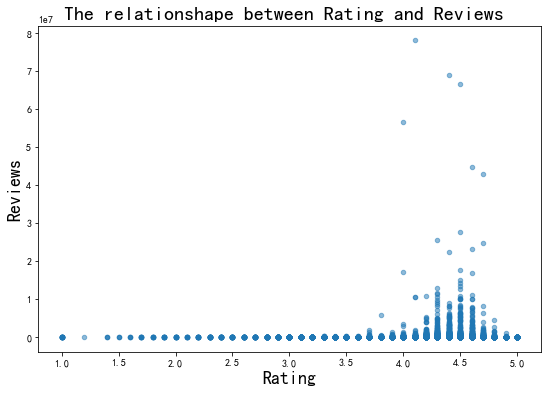

In [330]:
df.plot.scatter('Rating', 'Reviews',alpha = 0.5,figsize = (9,6));  #Rating , Reviews 两列直接的散点图
plt.xlabel('Rating',fontsize = 18)
plt.ylabel('Reviews',fontsize = 18)
plt.title('The relationshape between Rating and Reviews ',fontsize = 20);

In [331]:
df['Rating'].corr(df['Reviews']) #计算相关性

0.05509815000877059

In [332]:
df.head(3)

,App,Rating,Reviews,Installs,Type,Price,Genres
882,🔥 Football Wallpapers 4K | Full HD Backgrounds 😍,4.7,11661,"1,000,000+",Free,0,Entertainment
7559,📏 Smart Ruler ↔️ cm/inch measuring for homework!,4.0,19,"10,000+",Free,0,Tools
2575,"💘 WhatsLov: Smileys of love, stickers and GIF",4.6,22098,"1,000,000+",Free,0,Social


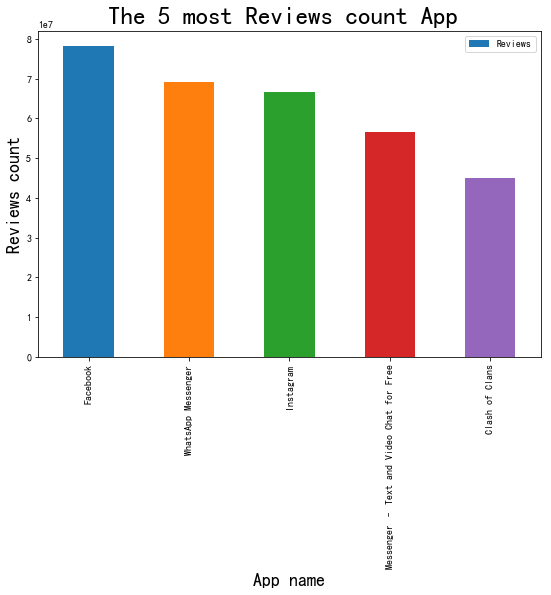

In [333]:
df.sort_values(by=['Reviews'], ascending = False)[:5].plot.bar('App','Reviews',figsize = (9,6));  #画出App评论数最多的Top5

plt.xlabel('App name',fontsize = 18)
plt.ylabel('Reviews count',fontsize = 18)
plt.title('The 5 most Reviews count App ',fontsize = 25);

4.173084431429965

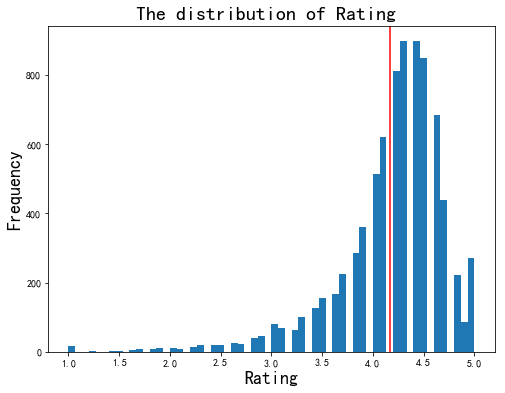

In [334]:
df['Rating'].plot.hist(bins=60, figsize = (8,6)); #评分的分布形态
Rating_mean = df['Rating'].mean()
plt.axvline(Rating_mean, color='r')

plt.xlabel('Rating',fontsize = 18)
plt.ylabel('Frequency',fontsize = 18)
plt.title('The distribution of Rating ',fontsize = 20)

Rating_mean

Type
Free    4.166201
Paid    4.259603
Name: Rating, dtype: float64

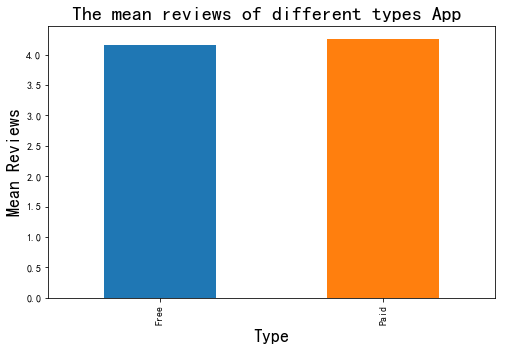

In [335]:
df.groupby('Type')['Rating'].mean().plot.bar(figsize = (8,5)); #对不同类别的app，进行分数对比

plt.xlabel('Type',fontsize = 18)
plt.ylabel('Mean Reviews',fontsize = 18)
plt.title('The mean reviews of different types App ',fontsize = 20)

df.groupby('Type')['Rating'].mean()

在数据的探索性分析中，请确保你对数据分析中的关键步骤和推理过程进行了记录。你可以自己插入code cell和markdown cell来组织你的报告。

## 4. 得出结论

**问题**：上面的分析能够回答你提出的问题？通过这些分析你能够得出哪些结论？

**答案**：

1，App的评价数量与评分无明显线性相关关系，二者的相关系数仅为0.055。

2，评论数最多的5个App是：Facebook，WhatsApp Messenger，Instagram，Messenger – Text and Video Chat for Free，Clash of Clans

3，评分的分布形态近似为正态分布，且为左偏态，评分均值为4.17分
                
4，从评论分数上看，付费App的评价稍好，付费的App评分均值为4.26，而免费的App评分均值为4.17。

## 反思

**问题**：在你的分析和总结过程中是否存在逻辑严谨。是否有改进的空间? 你可以从下面的一些角度进行思考：
1. 数据集是否完整，包含所有想要分析的数据？
2. 在对数据进行处理的时候，你的操作（例如删除/填充缺失值）是否可能影响结论？
3. 是否还有其他变量（本数据中没有）能够对你的分析有帮助？
4. 在得出结论时，你是否混淆了相关性和因果性？

**答案**：

1，数据集并不十分完整，尚未包含所以想要分析的数据。

2，数据清洗时，由于删除了部分缺失值，这难免会减少样本数量，对数据分析及其结论的得出会产生影响。

3，有，如若有对应用户卸载数的数据和在试用用户的数据，便可更好的分析App的受欢迎程度。

4，否，在得出结论时，仅对数据结果进行描述和相关性分析，并未做任何因果分析。

恭喜你完成了此项目！这只是数据分析过程的一个样本：从生成问题、整理数据、探索数据到得出结论。在数据分析(进阶)纳米学位中，你将会学到更多高级的数据分析方法和技术，如果你感兴趣的话，我们鼓励你继续学习后续的课程，掌握更多的数据分析的高级技能！

> 若想与他人分享我们的分析结果，除了向他们提供 jupyter Notebook (.ipynb) 文件的副本外，我们还可以将 Notebook 输出导出为一种甚至那些未安装 Python 的人都能打开的形式。从左上方的“文件”菜单，前往“下载为”子菜单。然后你可以选择一个可以更普遍查看的格式，例如 HTML (.html) 。你可能需要额外软件包或软件来执行这些导出。